In [1]:
#project: p11
#submitter: bodla
#partner: kksun

In [2]:
from cleanMAC import * 
# clean the .DS_Store file in MAC
clean()

import os, json, csv, pandas as pd
from collections import namedtuple as nt
from collections import defaultdict

In [3]:
#p10 function

def get_files(path):
    return sorted(os.listdir(path), reverse = True)

def get_paths(dir_):
    files = os.listdir(dir_)
    paths = []
    for file in files:
        paths.append(os.path.join(dir_, file))
    return sorted(paths, reverse = True)

def get_csv_paths(dir_, extensions = ".csv"):
    all_paths = get_paths(dir_)
    
    # get paths with .csv extension
    return [csv_file for csv_file in all_paths if csv_file[-len(extensions):] in extensions]

In [4]:
#p10 functions cont

Tweet = nt('Tweet', ['tweet_id', 'username', 'num_liked', 'length'])

#takes a list and gets the tweet
def format_tweets(header, tweets, fields = ['tweet_id', 'username', 'num_liked', 'tweet_text']):
    all_tweets = []
    
    for tweet in tweets:
        tweet_dict = {}
        
        #for each tweet add the appropriate attribute the dicitonary
        #then convert the dict into a Tweet namedTuple and append to all_tweets list
        try:
            for i, item in enumerate(tweet):
                head = header[i]
                if head in fields:
                    if head == 'tweet_text':
                        tweet_dict['length'] = len(item)
                    elif head == 'num_liked':
                        tweet_dict[head] = int(item)
                    else:
                        tweet_dict[head] = (item)
            all_tweets.append(Tweet(**tweet_dict))
        except:
            continue
            
    return all_tweets
    

def get_tweets(dir_ = "sample_data", file = "1.csv"):
    
    try:
        data = open(os.path.join(dir_, file), encoding = "utf-8")
        tweet_data = list(csv.reader(data))
        file_h = tweet_data[0]
        file_d = tweet_data[1:]
        
        data.close()
        return format_tweets(file_h, file_d)
            
    except FileExistsError:
        data.close()
        raise FileExistsError
        
def format_tweets_json(tweet_json):
    all_tweets = []
    for tw_id,tw_d in tweet_json.items():
        all_tweets.append(Tweet(tw_id, tw_d['username'], tw_d['num_liked'], len(tw_d['tweet_text'])))
    
    return all_tweets

def get_tweets_json(dir_ = "sample_data", file = "2.json"):
    try:
        #get the json data from the passed file
        data = open(os.path.join(dir_, file))
        tweet_json = json.loads(data.read())
        
        #get the tweets 
        data.close()
        return format_tweets_json(tweet_json);
        
    except FileNotFoundError:
        data.close()
        raise FileNotFoundError
        


In [5]:
#p10 functions cont

def get_tweets_in_file(file, dir_ =  "full_data"):
    #based on the file type, make the correct format tweet funciton call and return the sorted version
    if '.csv' == file[-4:]:
        return sorted(get_tweets(dir_ =  dir_, file = file), key = lambda tweet:tweet.tweet_id)
    elif '.json' == file[-5:]:
        try:
            return sorted(get_tweets_json(dir_ =  dir_, file = file), key = lambda tweet:tweet.tweet_id)
        except:
            pass
    
    #should not happen, this is for debugging
    return []

def tweetsLessThan(textLength = 50):
    all_files = get_files('full_data')
    
    #get all tweets, then filter for tweets with len<textLength
    tweets = []
    for file in all_files:
        tweets += get_tweets_in_file(file)
    
    #filter list comprehension
    tweets_filtered = [tw_filtered for tw_filtered in tweets if tw_filtered.length < textLength]
    return tweets_filtered

def find_tweet(id_ = '1467812784', dir_ = 'sample_data', ):
    
    #return a list of ids from a list of tweets
    def extract_ids(tweets):
        ids = []
        for tweet in tweets:
            ids.append(tweet.tweet_id)
        return ids
    
    #go through the files in dir_, extract the ids for each file, then search for id
    all_files = get_files(dir_)
    for file in all_files:
        #check if id is in the current file's id list
        if id_ in extract_ids(get_tweets_in_file(file,dir_)):
            return os.path.join(dir_,file)
    
    #id not found
    raise Exception("Id {} not found!".format(id))
    
    
#return a list of users from a list of tweets
def extract_users(tweets):
    usernames = []
    for tweet in tweets:
        usernames.append(tweet.username)
    return usernames

def format_tweet_liked(tweet):
    try:
        return int(tweet.num_liked)
    except ValueError:
        curr_liked = tweet.num_liked
        #handeling edge cases: the num_liked has a suffix
        
        if isinstance(curr_liked, str):
            if curr_liked[-1].upper() == "M":
                curr_liked = int(curr_liked[:-1]) * 1000000
            elif curr_liked[-1].upper() == "K":
                curr_liked = int(curr_liked[:-1]) * 1000
            else:
                curr_liked = 0
        return curr_liked

In [6]:
#q1

def get_all_tweets(dir_ = os.path.join("full_data")):
    try:
        files = os.listdir(dir_)
        
        tweets = []
        for file in files:
            tweets += get_tweets_in_file(file,"full_data")
        return tweets
    
    except FileNotFoundError:
        raise FileNotFoundError

len(get_all_tweets())

445

In [7]:
#q2

all_tweets   = get_all_tweets(dir_ = os.path.join("full_data"))
unique_users = set(extract_users(all_tweets))

unique_users

{'USERID_1',
 'USERID_10',
 'USERID_2',
 'USERID_3',
 'USERID_4',
 'USERID_5',
 'USERID_6',
 'USERID_7',
 'USERID_8',
 'USERID_9'}

In [8]:
#q3

prolific_users = dict.fromkeys(unique_users, 0)

for tweet in all_tweets:
    curr_user = tweet.username
    if curr_user in prolific_users:
        prolific_users[curr_user] += 1
        
prolific_users

{'USERID_5': 46,
 'USERID_3': 39,
 'USERID_1': 52,
 'USERID_4': 35,
 'USERID_10': 45,
 'USERID_9': 44,
 'USERID_2': 47,
 'USERID_8': 31,
 'USERID_7': 55,
 'USERID_6': 51}

In [9]:
#q4

largest_like = dict.fromkeys(unique_users, 0)

#q4: What is the largest number of likes received on a tweet for each user?
# Answer with a dict that maps username to the largest number of likes by that user. Make sure all values in this dict are integers.
# Hint: Your function from p10 #q20 converted the num_liked into an integer.
 
# '''
# 1. Get all the tweets (var all_tweets)
# 2. Iterate through the list
# 3. with each tweet, check if the number of likes is greater than the stored number of likes
# '''

for tweet in all_tweets:
    largest_like[tweet.username] = max(format_tweet_liked(tweet), largest_like[tweet.username])
    
largest_like

{'USERID_5': 9608,
 'USERID_3': 9678,
 'USERID_1': 9393,
 'USERID_4': 9618,
 'USERID_10': 9936,
 'USERID_9': 9728,
 'USERID_2': 869000000,
 'USERID_8': 915000,
 'USERID_7': 9851,
 'USERID_6': 9149}

In [10]:
#q5

longest_tweet = defaultdict(int)

for tweet in all_tweets:
    longest_tweet[tweet.username] = max(tweet.length, longest_tweet[tweet.username])
    
dict(longest_tweet)

{'USERID_1': 150,
 'USERID_2': 138,
 'USERID_6': 145,
 'USERID_7': 144,
 'USERID_4': 138,
 'USERID_8': 145,
 'USERID_5': 146,
 'USERID_10': 136,
 'USERID_9': 137,
 'USERID_3': 138}

In [11]:
%matplotlib inline

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

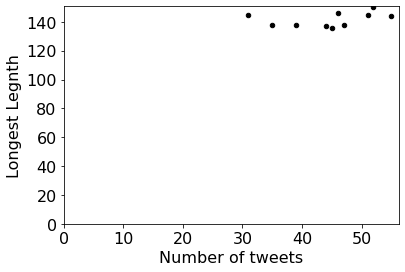

In [12]:
#q6
scatter(prolific_users, dict(longest_tweet),xlabel="Number of tweets", ylabel="Longest Legnth")

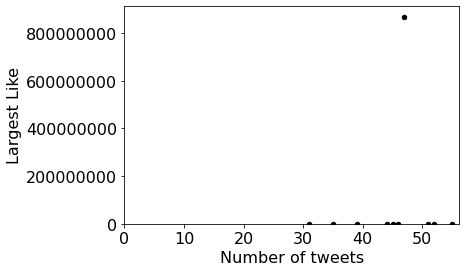

In [13]:
#q7
scatter(prolific_users, largest_like,xlabel="Number of tweets", ylabel="Largest Like")

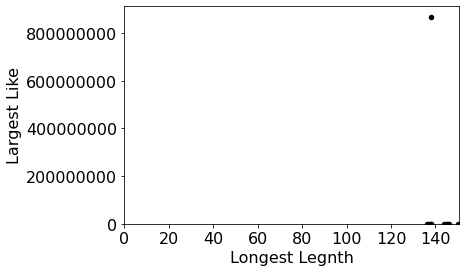

In [14]:
#q8
scatter(dict(longest_tweet), largest_like, xlabel="Longest Legnth", ylabel="Largest Like")

In [15]:
#q9

#find the current most liked user in the largest_like dict
def most_liked_user():
    #logic: find the largest like from the values of largest_like, get its index, then return that index from the keys
    max_like = max(largest_like.values()) #largest curr liked
    indx_max_like = list(largest_like.values()).index(max_like)
    
    return list(largest_like.keys())[indx_max_like]

usr_max_like = most_liked_user()
usr_max_like

'USERID_2'

In [16]:
#q10

# get every tweet a particular user has made in our dataset
def find_tweets_user(user):
    user_tweets = []
    
    for tweet in all_tweets:
        if tweet.username == user:
            user_tweets.append(tweet)
    return sorted(user_tweets, key = format_tweet_liked, reverse = True)

usr_2_tweets = find_tweets_user(usr_max_like)
usr_2_tweets

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked='869M', length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USERID

In [17]:
#q11

#find the tweets the user has made, then extract the likes
def extract_num_liked_user(user):
    user_tweets = find_tweets_user(user)
    likes = []
    
    #extracting num of likes
    for tweet in user_tweets:
        if(isinstance(tweet.num_liked, int)):
            likes.append(tweet.num_liked)
        
    return likes

usr_2_likes = extract_num_liked_user(usr_max_like)
sum(usr_2_likes)/len(usr_2_likes)

5003.565217391304

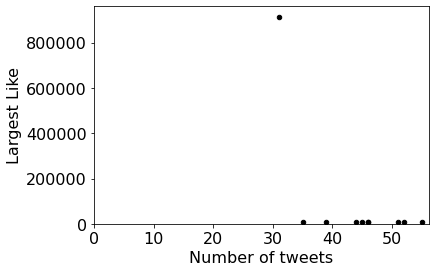

In [18]:
#q12

#get the largest like and remove it from the data
largest_like[usr_max_like] = usr_2_likes[0]
prolific_users[usr_max_like] -= 1

scatter(prolific_users, largest_like,xlabel="Number of tweets", ylabel="Largest Like")

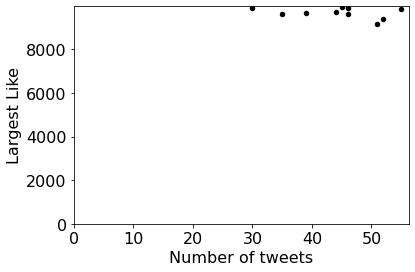

In [19]:
#q13

#refind the largest like and remove it from the data
usr_max_like = most_liked_user()
largest_like[usr_max_like] = usr_2_likes[0]
prolific_users[usr_max_like] -= 1

scatter(prolific_users, largest_like,xlabel="Number of tweets", ylabel="Largest Like")

In [20]:
#q14

#find the files in the path and ignore anything starting with '.'
def find_files_dir(files = [], path = os.path.join('play','rb','rb8')):
    
    for file in os.listdir(path):
        rel_path = os.path.join(path,file)
        
        #skip everything with a '.' at the beggining
        #descend into dir if rel_path is dir
        if(file[0] == '.'):
            continue
        elif(os.path.isdir(rel_path)):
            files = find_files_dir(files, path = os.path.join(path, file))
        
        # skip rel_path if is a dir or already in files
        if (not os.path.isdir(rel_path)):
            files.append(rel_path)
    
    return sorted(files, reverse = True)
                     
find_files_dir()

[]

In [21]:
#q15
find_files_dir(path = os.path.join('play', 'ou'))

['play/ou/v',
 'play/ou/quap/uikwe',
 'play/ou/quap/qonxu.txt',
 'play/ou/quap/aoq/qsonj',
 'play/ou/quap/aoq/aqnsa',
 'play/ou/b',
 'play/ou/a']

In [22]:
#q16
find_files_dir(files = [], path = os.path.join('play'))

['play/rb/rb9/89.csv',
 'play/rb/rb9/12.xls',
 'play/rb/ppt.ppt',
 'play/ou/v',
 'play/ou/quap/uikwe',
 'play/ou/quap/qonxu.txt',
 'play/ou/quap/aoq/qsonj',
 'play/ou/quap/aoq/aqnsa',
 'play/ou/b',
 'play/ou/a',
 'play/ls/qwe/usun.pdf',
 'play/ls/qwe/iuqwe.json',
 'play/ls/mf.py',
 'play/ls/lu.txt']

In [23]:
#q17
find_files_dir(files = [], path = os.path.join('recursive', 'others'))

['recursive/others/USERID_9.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_6.json',
 'recursive/others/USERID_5.json',
 'recursive/others/USERID_10.json']

In [24]:
#q18
find_files_dir(files = [], path = os.path.join('recursive'))

['recursive/others/USERID_9.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_6.json',
 'recursive/others/USERID_5.json',
 'recursive/others/USERID_10.json',
 'recursive/USERID_4/true/tweets.json',
 'recursive/USERID_4/false/tweets.json',
 'recursive/USERID_3/tweets.json',
 'recursive/USERID_2/tweets.json',
 'recursive/USERID_1/tweets.json']

In [25]:
#q19

def num_tweets_dir(path = os.path.join('recursive', 'USERID_4')):
    all_files  = find_files_dir(files = [], path = path)
    all_tweets = []
    
    # for each file get the tweets
    for sing_file in all_files:
        file_path = os.path.split(sing_file)
        all_tweets += get_tweets_in_file(file = file_path[1], dir_ =  file_path[0])
    
    return len(all_tweets)

num_tweets_dir()

17

In [26]:
#q20
num_tweets_dir('recursive')

200